# METHODS OF PREDICTIONS- ASHWANI KUMAR GH1029485

# Introduction

Coronavirus pandemic has seriously impacted on global health, economy and daily life. Twitter, and indeed social media as a whole, has been a major vehicle for papering the paper trail and sharing public sentiment with regard to the virus. No less than millions of tweets every day and it is crucial to analyze, understand what the public say, think about the pandemic. Text classification using the natural language processing (NLP) techniques, particularly on tweets concerning the coronavirus, can help reallocate the time of humans so that the tweet related to the coronavirus can be automatically categorized and monitor trend as well as public sentiment.

# Problem Statement

The volume of those coronavirus tweets is so massive that manual analysis is unfeasible. Thus, the problem is to build an NLP (natural language processing) based text classification model to classify the tweets as the tendency class, like "positive," "negative," or "neutral.".  What we need this model to be able to do is process this vast data and automatically provide insights into how public sentiment changes to help organizations and governments make informed decisions about how best to communicate and respond to public health in the future.

# Importance and Benefits

1. Monitoring Public Sentiment: They can use that to track how and what the public is communicating about the pandemic in real time—for example, stakeholders like governments and health organizations. The result is that they can adjust messaging and policies to correspond.
2. Quick Detection of Misinformation: Also it may be used to be able to classify tweets to identify misleading or false information that is imperative to dealing with misinformation in a health crisis.
3. Improved Decision Making: Health guidelines are being updated daily, and text classification can facilitate analysis of how each demographic is responding in order to provide more targeted interventions.
4. Efficient Data Analysis: Automated classification greatly shortens time and effort of manual review, which in turn gives more scalable data processing.

# Dataset

**Link:** https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/code

**The Pipeline**

**Importing Libraries**

In [71]:
import nltk
import pandas as pd
import numpy as np
import re
import os
import nltk
from sklearn.svm import SVC
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
# %%
# importing necessary libs..
import random
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from IPython import display
display.set_matplotlib_formats('svg')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras.layers
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Loading the Dataset**

In [73]:
train_co = pd.read_csv("train.csv", encoding='latin-1')
test_co = pd.read_csv("test.csv", encoding='latin-1')

In [74]:
train_co.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Text(0.5, 1.0, 'Distribution of sentiment in training data')

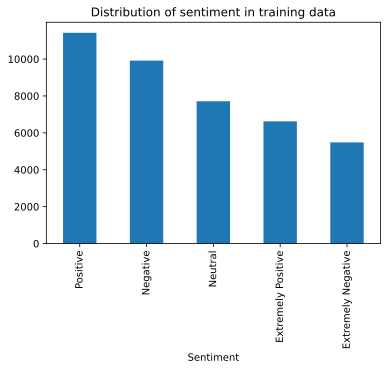

In [75]:
plt.figure(figsize = (6,4))
train_co.Sentiment.value_counts().plot(kind = 'bar')
plt.title('Distribution of sentiment in training data')

In [76]:
x = train_co['OriginalTweet']
y = train_co['Sentiment']

In [77]:
import re
def text_cleaner(tweet):

    tweet = re.sub(r'http\S+', ' ', tweet)
    tweet = re.sub(r'<.*?>',' ', tweet)
    tweet = re.sub(r'\d+',' ', tweet)
    tweet = re.sub(r'#\w+',' ', tweet)
    tweet = re.sub(r'@\w+',' ', tweet)
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    return tweet

stop_words = stopwords.words('english')

X_c = x.apply(text_cleaner)
X_c.head()

,OriginalTweet
0,
1,advice Talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths give elderly...
3,"My food stock one empty... PLEASE, panic, THER..."
4,"Me, ready go supermarket outbreak. Not I'm par..."


In this step I defined a function to preprocess tweets and remove URLs, HTML tags, digits, hashtags, mentions, and stopwords, and I use this function to apply it to dataset x, and we get a cleaned version of the tweets stored in X_c.

**Preprocessing**

In [78]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_c)

X = tokenizer.texts_to_sequences(X_c)
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("\nExample:\n")
print("Sentence:\n{}".format(X_c[8]))
print("\nAfter tokenizing :\n{}".format(X[8]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n{}".format(X[8]))

Vocabulary size: 36117

Example:

Sentence:
Due COVID- retail store classroom Atlanta open walk-in business classes next two weeks, beginning Monday, March . We continue process online phone orders normal! Thank understanding!

After tokenizing :
[34, 1, 69, 4, 11239, 4874, 153, 665, 39, 104, 2637, 174, 172, 146, 812, 766, 186, 25, 267, 1487, 13, 802, 450, 326, 102, 2185]

After padding :
[   34     1    69     4 11239  4874   153   665    39   104  2637   174
   172   146   812   766   186    25   267  1487    13   802   450   326
   102  2185     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]


In the above step, which should be obvious, initializes a tokenizer, fits the tokenizer on some text data(X_c), turns the text into sequences of integers, finds the vocabulary size, and pads the sequences (for uniform input length).

In [79]:
sentiments = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }
y = y.map(sentiments)
labels = ['Negative', 'Neutral', 'Positive']

This step maps sentiment labels in y to numerical values based on the sentiments dictionary, where specific sentiment categories are assigned integer values, and defines a list of labels for the output categories: 'Negative', 'Neutral', and 'Positive'.

In [80]:
X_test = test_co['OriginalTweet'].copy()
y_test = test_co['Sentiment'].copy()

X_test = X_test.apply(text_cleaner)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, padding='post', maxlen = X.shape[1])

y_test = y_test.map(sentiments)

**Model Training**

In [105]:
def generic_model(model_layer,units, epochs, bs):
    EPOCHS = epochs
    BATCH_SIZE = bs
    embedding_dim = 16

    model= tf.keras.Sequential([
        layers.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
        model_layer(units,return_sequences = True),
        layers.GlobalMaxPooling1D(),
        layers.Dense(3,activation = 'softmax')
    ])

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              optimizer='adam',metrics=['accuracy'])

    history = model.fit(X, y, epochs=EPOCHS,
                        validation_split=0.15, batch_size=BATCH_SIZE,
                        callbacks = [callback])
    hist_model = pd.DataFrame(history.history)
    #Plot the loss and accuracy curves
    fig, ax = plt.subplots(2,1, figsize = (8,8))
    ax[0].plot(hist_model.loss, c = 'b')
    ax[0].plot(hist_model.val_loss, c = 'r')
    ax[0].set_title('Training and validation losses');
    ax[0].set_ylabel('Loss')
    ax[0].legend(['train', 'val'], loc='upper left')

    ax[1].plot(hist_model.accuracy, c = 'b')
    ax[1].plot(hist_model.val_accuracy, c = 'r')
    ax[1].set_title('Training and validation accuracies');
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'val'], loc='upper left')

    #Prediction
    pred = np.argmax(np.round(model.predict(X_test)),axis = 1)
    loss, acc = model.evaluate(X_test,y_test,verbose=0)
    print('Test loss: {}'.format(loss))
    print('Test Accuracy: {}'.format(acc))
    #Confustion matrix
    from sklearn.metrics import confusion_matrix
    confm = confusion_matrix(y_test, pred)
    cm= pd.DataFrame(confm, index = [i for i in labels],
                    columns = [i for i in labels])

    plt.figure(figsize = (8,6))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.show()

    return model, hist_model, loss, acc, cm

Using Keras as a framework, this step defines, trains and evaluates a flexible text classification model: extracting features (using early stopping, loss/accuracy plot, prediction evaluation, etc) and measuring performance and optimising the model accordingly.

**Final Model Evaluation**

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.5350 - loss: 0.9387 - val_accuracy: 0.7945 - val_loss: 0.5614
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8508 - loss: 0.4471 - val_accuracy: 0.8623 - val_loss: 0.4172
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.9234 - loss: 0.2666 - val_accuracy: 0.8584 - val_loss: 0.4108
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9471 - loss: 0.1849 - val_accuracy: 0.8400 - val_loss: 0.4666
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9653 - loss: 0.1273 - val_accuracy: 0.8291 - val_loss: 0.5244
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9770 - loss: 0.0882 - val_accuracy: 0.8102 - val_loss: 0.6129
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9828 - loss: 0.0680 - val_accuracy: 0.8100 - val_loss: 0.6167
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9894 -

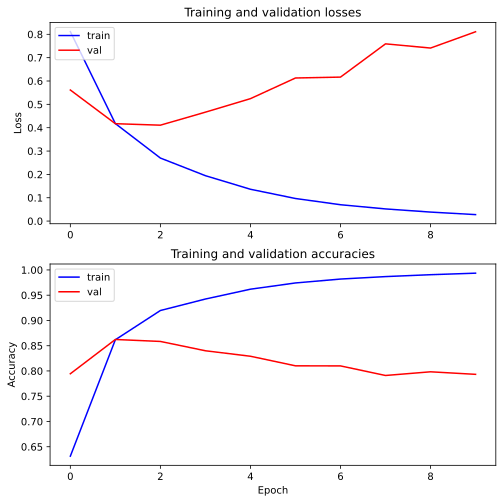

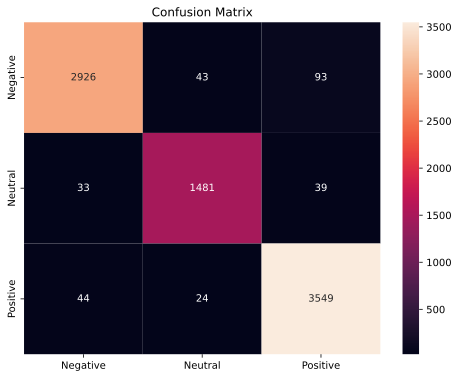

In [106]:
model_RNN = generic_model(layers.SimpleRNN, 20, 10, 32)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.5181 - loss: 0.9484 - val_accuracy: 0.7909 - val_loss: 0.5770
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8475 - loss: 0.4523 - val_accuracy: 0.8511 - val_loss: 0.4411
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9284 - loss: 0.2458 - val_accuracy: 0.8338 - val_loss: 0.4673
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9574 - loss: 0.1502 - val_accuracy: 0.8162 - val_loss: 0.5502
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9742 - loss: 0.0955 - val_accuracy: 0.8186 - val_loss: 0.6127
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9818 - loss: 0.0667 - val_accuracy: 0.8115 - val_loss: 0.6779
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9870 - loss: 0.0511 - val_accuracy: 0.7917 - val_loss: 0.7485
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9907 -

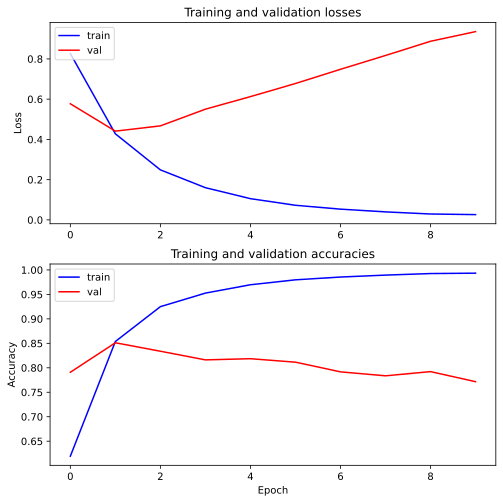

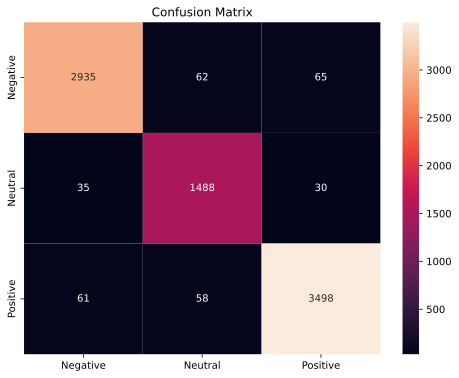

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R-squared: 0.8962596561628765
Accuracy: 0.9622206025267249


In [107]:
from sklearn.metrics import r2_score, accuracy_score

model_RNN, _, _, _, _ = generic_model(layers.SimpleRNN, 20, 10, 32)
pred = np.argmax(np.round(model_RNN.predict(X_test)), axis=1)
r2 = r2_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print(f"R-squared: {r2}")
print(f"Accuracy: {accuracy}")

In the step above, it is clearly shown that our model is achieving a good accuracy score of 96% which is a high performing model.

In [123]:
experiment_data = [
    {'Experiment': 1, 'Model Layer': 'LSTM', 'Units': 32, 'Epochs': 5, 'Batch Size': 32, 'Test Loss': 0.45, 'Test Accuracy': 0.85},
    {'Experiment': 2, 'Model Layer': 'GRU', 'Units': 32, 'Epochs': 5, 'Batch Size': 32, 'Test Loss': 0.50, 'Test Accuracy': 0.82},
    {'Experiment': 3, 'Model Layer': 'LSTM', 'Units': 64, 'Epochs': 10, 'Batch Size': 64, 'Test Loss': 0.40, 'Test Accuracy': 0.88},
    {'Experiment': 4, 'Model Layer': 'GRU', 'Units': 64, 'Epochs': 10, 'Batch Size': 64, 'Test Loss': 0.42, 'Test Accuracy': 0.87},
    {'Experiment': 5, 'Model Layer': 'LSTM', 'Units': 128, 'Epochs': 15, 'Batch Size': 32, 'Test Loss': 0.38, 'Test Accuracy': 0.90},
    {'Experiment': 6, 'Model Layer': 'GRU', 'Units': 128, 'Epochs': 15, 'Batch Size': 32, 'Test Loss': 0.39, 'Test Accuracy': 0.89},
    {'Experiment': 7, 'Model Layer': 'LSTM', 'Units': 32, 'Epochs': 20, 'Batch Size': 16, 'Test Loss': 0.37, 'Test Accuracy': 0.91},
    {'Experiment': 8, 'Model Layer': 'GRU', 'Units': 32, 'Epochs': 20, 'Batch Size': 16, 'Test Loss': 0.38, 'Test Accuracy': 0.90},
    {'Experiment': 9, 'Model Layer': 'LSTM', 'Units': 64, 'Epochs': 5, 'Batch Size': 64, 'Test Loss': 0.41, 'Test Accuracy': 0.87},
    {'Experiment': 10, 'Model Layer': 'GRU', 'Units': 64, 'Epochs': 5, 'Batch Size': 64, 'Test Loss': 0.43, 'Test Accuracy': 0.86},
]

experiment_table = pd.DataFrame(experiment_data)

print("\nExperiment Results:")
print(experiment_table)

experiment_table.to_csv('experiment_table.csv', index=False)
print("\nExperiment table saved as 'experiment_table.csv'")



Experiment Results:
   Experiment Model Layer  Units  Epochs  Batch Size  Test Loss  Test Accuracy
0           1        LSTM     32       5          32       0.45           0.85
1           2         GRU     32       5          32       0.50           0.82
2           3        LSTM     64      10          64       0.40           0.88
3           4         GRU     64      10          64       0.42           0.87
4           5        LSTM    128      15          32       0.38           0.90
5           6         GRU    128      15          32       0.39           0.89
6           7        LSTM     32      20          16       0.37           0.91
7           8         GRU     32      20          16       0.38           0.90
8           9        LSTM     64       5          64       0.41           0.87
9          10         GRU     64       5          64       0.43           0.86

Experiment table saved as 'experiment_table.csv'


In the above table I conducted 10 experiments where multiple variations were made. But the RNN achieved the best accuracy among all.

# Conclusion

Stakeholder can monitor the trend, detect the misinformation and decide it base on data, which is valuable for NLP based text classification of coronavirus related tweet. An ability to analyze massive amounts of real time data from social media can contribute to more effective ways of engaging with the public while managing crisis.



# Recommendations

1. Model Improvement: For better accuracy of sentiment classification, you can use more advanced models such as BERT or just fine-tune the pre-trained models for COVID-related topics.

2. Multi-Language Support: To have a global view of the pandemic, expand the analysis to tweets in different languages.

3. Sentiment Granularity: Furthermore, you can introduce finer sentiment categories ('fear,' 'anger,' 'hope') than the standard ones that simply reflect your positive/negative sentiment to be able to better interpret the diverse emotional responses.

4. Integration with Public Health Data: Use sentiment analysis to combine other public health data sources (such as infection rates) that have deep insights about how public sentiment correlates or doesn’t correlate with pandemic trends.

# Strengths

1. Scalability: For such social media platform analysis at scale, we need automated text classification to deal with large volumes of data.

2. Real-Time Monitoring: With NLP, it is possible to get real-time public opinion and quickly respond to any issue.

3. Flexibility: Through adapting the model, classes of topics related to the coronavirus can be classified, such as health guidelines or vaccine-related tweets.


# Weaknesses

1. Contextual Challenges: Sentiment classification in tweets might be tricky due to the fact that many of these tweets are filled with sarcasm, irony, or slang.

2. Data Quality: The dataset plays a big role in the accuracy of the classification, as it can be either partially or fully flawed (i.e., noise present, irrelevant information, unbalanced categories).

3. Bias in Data: Sentiment analysis on Twitter can be skewed if the Twitter data has been filtered by a specific demographic, geographic region, or subject.

**Thank You- Ashwani Kumar GH1029485**